In [56]:
from utils import getSplits, getSplitsMultiple
from Config import Config
import random
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
from sys import getsizeof

In [9]:
config = Config(game = 'oldWordle')

In [10]:
# g1,g2 = random.choices(config.guesses, k = 2)

In [11]:
# g1, g2

In [12]:
# splits1 = getSplits(g1, config.answers)
# splits2 = getSplits(g2, config.answers)

In [13]:
# def toTuples(splits):
#     items = [(int(k,3), v) for k,v in splits.items()]
#     items.sort()
#     return [k for k,_ in items], [v for _,v in items]

In [14]:
# plt.figure(figsize = (15, 7))
# plt.scatter(*toTuples(splits1), color = 'red')
# plt.scatter(*toTuples(splits2), color = 'blue')
# plt.show()

In [15]:
# sizes1 = sorted(splits1.values(), reverse = True)
# sizes2 = sorted(splits2.values(), reverse = True)

In [16]:
# m = len(sizes1)
# n = len(sizes2)

In [17]:
# splitsComb = getSplitsMultiple([g1,g2], config.answers)

In [18]:
# sizesComb = sorted(splitsComb.values(), reverse = True)

In [19]:
# # Number of splits
# p = len(sizesComb)
# lo1 = max(m, n)
# hi1 = min(m*n, len(config.answers))
# hi2 = sum(min(a,n) for a in sizes1)
# hi3 = sum(min(m,b) for b in sizes2)

# # print(f"lo1 <= p: {lo1 <= p}")
# # print(f"p <= hi1: {p <= hi1}")
# # print(f"p <= hi2: {p <= hi2}")
# # print(f"p <= hi3: {p <= hi3}")

In [75]:
nSamples = 10000

In [66]:
nSplitsEsts = []
maxSizeEsts = []
for _ in tqdm(range(nSamples)):
    g1, g2 = random.choices(config.guesses, k = 2)
    sizes1 = sorted(getSplits(g1, config.answers).values(), reverse = True)
    sizes2 = sorted(getSplits(g2, config.answers).values(), reverse = True)
    
    m = len(sizes1)
    n = len(sizes2)
    
    a1 = sizes1[0]
    b1 = sizes2[0]
    
    sizesComb = sorted(getSplitsMultiple([g1,g2], config.answers).values(), reverse = True)
    
    p = len(sizesComb)
    c1 = sizesComb[0]
    
    lo1 = max(m, n)
    hi1 = min(m*n, len(config.answers))
    hi2 = sum(min(a,n) for a in sizes1)
    hi3 = sum(min(m,b) for b in sizes2)
    
    tlo = max(ceil(a1/n), ceil(b1/m))
    thi = min(a1, b1)
    
    nSplitsEsts.append((lo1, p, min(hi1,hi2,hi3)))
    maxSizeEsts.append((tlo, c1, thi))



100%|████████████████████████████████████████████████████| 10000/10000 [08:52<00:00, 18.78it/s]


In [67]:
# nSplitsEsts

In [68]:
# maxSizeEsts

In [74]:
plt.figure(figsize = (10,10))
plt.title(f"nSplitsEsts (samples = {nSamples})")
los,mids,his = zip(*nSplitsEsts)
# b = min(max(his), max(mids))
b = max(his)
plt.plot([0, b], [0, b], color = 'red', linestyle='dashed')
plt.scatter(mids, mids, color = 'red')
plt.scatter(mids, los, color = 'purple')
plt.scatter(mids, his, color = 'blue')
plt.show()

NameError: name 'nSamples' is not defined

<Figure size 720x720 with 0 Axes>

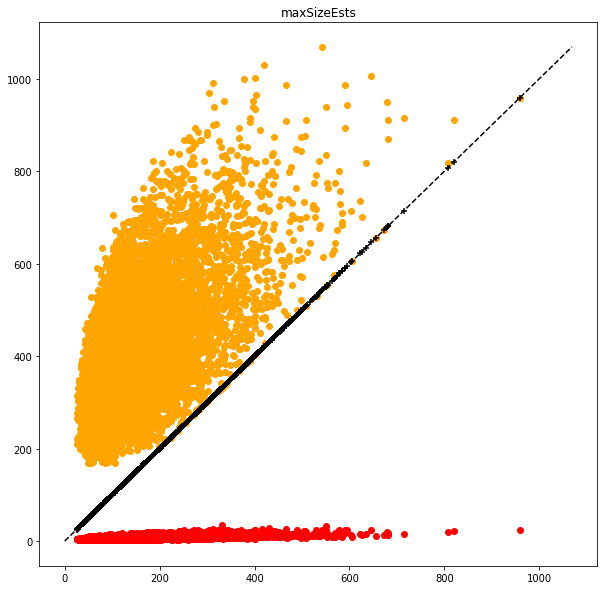

In [70]:
plt.figure(figsize = (10,10))
plt.title(f"maxSizeEsts (samples = {nSamples})")
los,mids,his = zip(*maxSizeEsts)
# b = min(max(his), max(mids))
b = max(his)
plt.plot([0, b], [0, b], color = 'black', linestyle='dashed')
plt.scatter(mids, los, color = 'red')
plt.scatter(mids, his, color = 'orange')
plt.scatter(mids, mids, color = 'black', marker='+')
plt.show()

In [73]:
sorted(nSplitsEsts, key = lambda x: (x[1]-x[0]))

[(72, 72, 1099),
 (55, 64, 650),
 (63, 74, 715),
 (93, 120, 1412),
 (58, 87, 927),
 (97, 127, 1646),
 (100, 135, 1344),
 (97, 133, 1697),
 (80, 117, 941),
 (104, 144, 1577),
 (95, 142, 817),
 (87, 134, 1073),
 (58, 110, 707),
 (100, 154, 1163),
 (97, 152, 1574),
 (95, 150, 1259),
 (71, 127, 1003),
 (98, 157, 1566),
 (71, 130, 899),
 (70, 130, 1020),
 (75, 135, 1202),
 (68, 128, 738),
 (64, 125, 773),
 (76, 138, 1258),
 (77, 140, 893),
 (101, 165, 821),
 (92, 156, 1297),
 (86, 151, 1467),
 (81, 148, 1264),
 (92, 159, 1159),
 (77, 144, 1189),
 (73, 140, 516),
 (67, 135, 885),
 (90, 158, 1165),
 (96, 164, 1619),
 (114, 182, 882),
 (77, 147, 1024),
 (74, 146, 963),
 (70, 142, 871),
 (102, 174, 1522),
 (73, 146, 897),
 (72, 147, 1002),
 (105, 180, 1088),
 (68, 143, 883),
 (103, 179, 1744),
 (63, 139, 712),
 (70, 146, 963),
 (73, 151, 943),
 (75, 153, 799),
 (73, 151, 1037),
 (88, 168, 875),
 (110, 190, 1648),
 (44, 124, 545),
 (101, 182, 1002),
 (102, 183, 1398),
 (89, 170, 1046),
 (62, 144

16560